##**Image Processing in Python:**

In [2]:
!pip install scikit-image

In [5]:
#import libraries
from skimage import data
from skimage import color

#sample data load
coffee_image = data.coffee()
coins_image = data.coins()
rocket_image = data.rocket()

In [4]:
#fucntion to display the image using matplotlib
import matplotlib.pyplot as plt
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

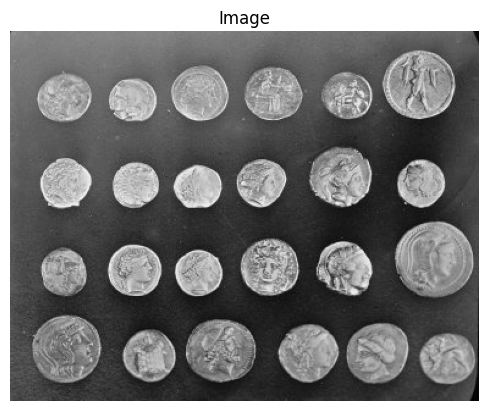

In [7]:
show_image(coins_image)

In [9]:
#convert image into grayscale
gray_coffee = color.rgb2gray(coffee_image)
gray_rocket = color.rgb2gray(rocket_image)

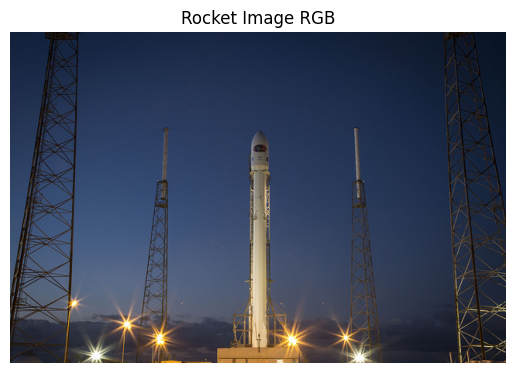

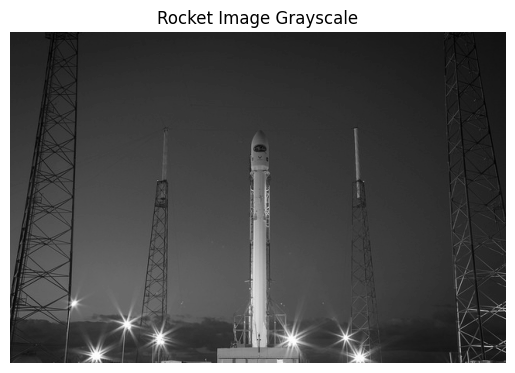

In [12]:
#Display Image
show_image(rocket_image, 'Rocket Image RGB')
show_image(gray_rocket,'Rocket Image Grayscale','gray')


#### **Numpy for Images:**

Images are in the form of NDarray.

In [28]:
#shape of image
coffee_image.shape

(400, 600, 3)

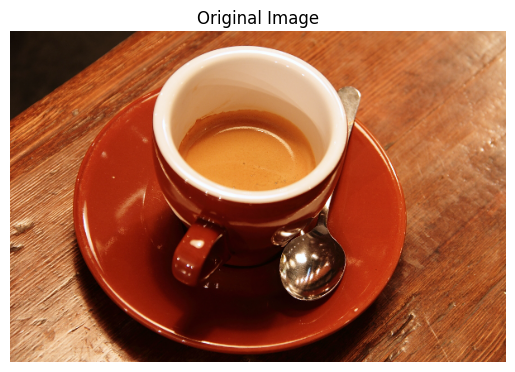

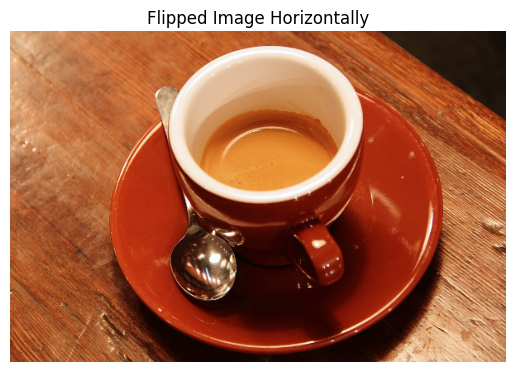

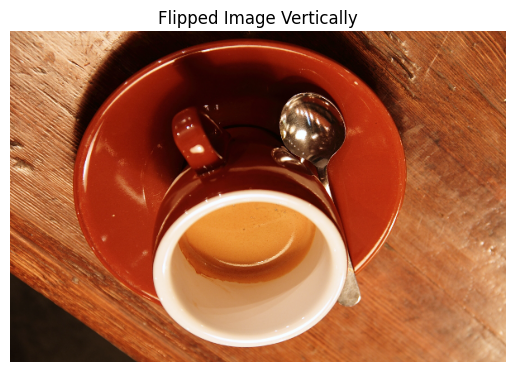

In [47]:
#Flipping the image
import numpy as np

show_image(coffee_image,'Original Image')

#flip horizontally
coffee_flipped_horizontal = np.fliplr(coffee_image)
show_image(coffee_flipped_horizontal,'Flipped Image Horizontally')

#flip vertically
coffee_flipped_vertical = np.flipud(coffee_image)
show_image(coffee_flipped_vertical,'Flipped Image Vertically')

#####**Histogram in Images**:

  - It shows amount of pixels in each intensity value. i.e. No of pixels (y axis) vs gray levels (x axis).
        - Darker Image = Low Intensity Values = 0 to 50
        - Brighter Image = High Intensity Values = 200 to 255

In [26]:
#extracting the colors from image
red = coffee_image[:,:,0]
green = coffee_image[:,:,1]
blue = coffee_image[:,:,2]

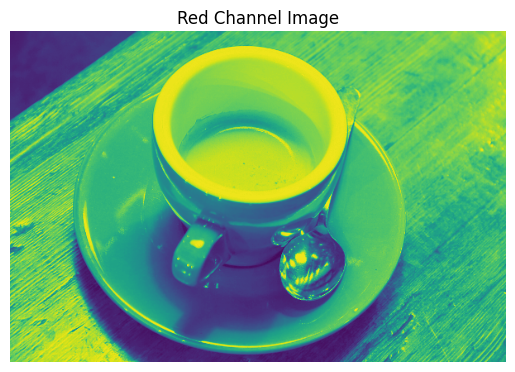

In [29]:
plt.imshow(red)
plt.title("Red Channel Image")
plt.axis('off')
plt.show()

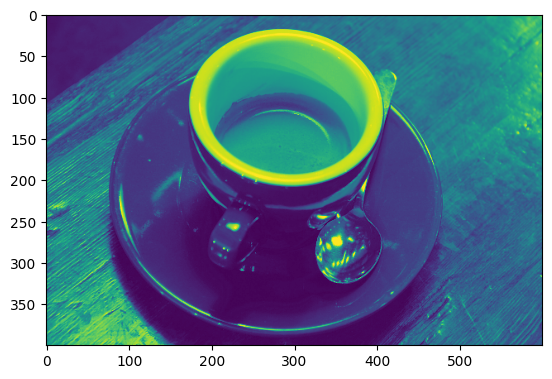

In [31]:
plt.imshow(green)

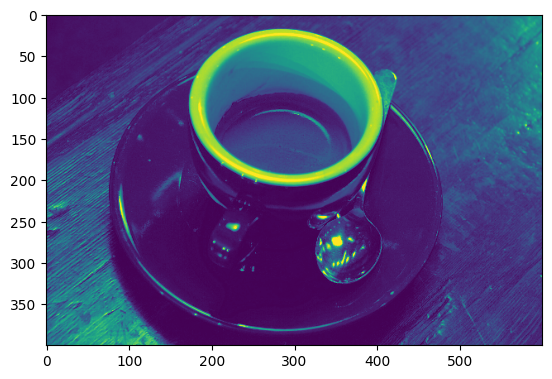

In [32]:
plt.imshow(blue)

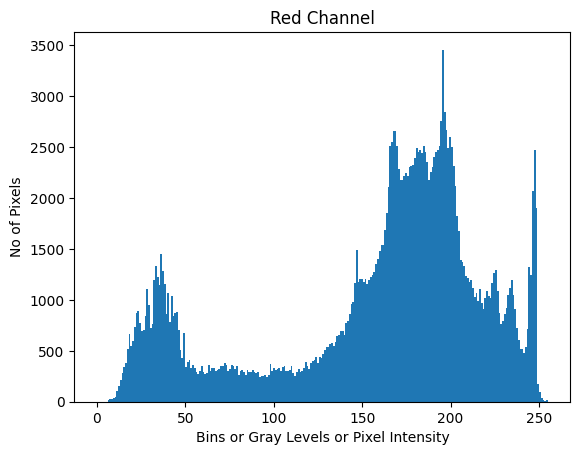

In [40]:
plt.hist(red.ravel(), bins= 256)
plt.title("Red Channel")
plt.xlabel("Bins or Gray Levels or Pixel Intensity")
plt.ylabel("No of Pixels")
plt.show()

#### **Thresholding:**

  - It is the process of separating/partitioning an image into a foreground and background by making it black and white.
  - It isolates the objects or foreground from the image, making it easier for detection and segmentation.
        255 (white): if pixel > threshold value
        0 (black): if pixel < threshold value


        Process:
        Original Image --> Grayscale Image --> Thresholded Image

        1. Set a threshold value
        2. Binary or Inverted Binary
           
           Binary = Image > Threshold  #foreground(black), background(white)
           Inverted_Binary =  Image <= Threshold #foreground(white), background(black)
  
  **Categories of Thresholding:**

       1. **Global or Histogram based:** works for uniform background illumination
       2. **Local or Adaptive:** works for uneven background illumination

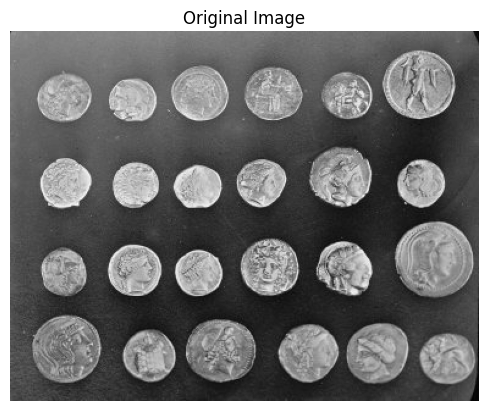

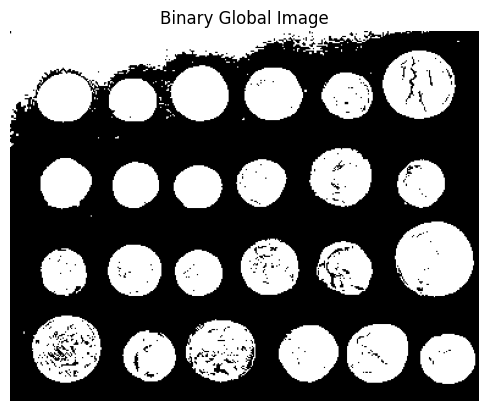

In [63]:
#Global Thresholding
from skimage.filters import threshold_otsu

#convert original to grayscale image if it is not

threshold_value = threshold_otsu(coins_image) #optimal global threshold

binary_global = coins_image > threshold_value

show_image(coins_image, 'Original Image')
show_image(binary_global, 'Binary Global Image')

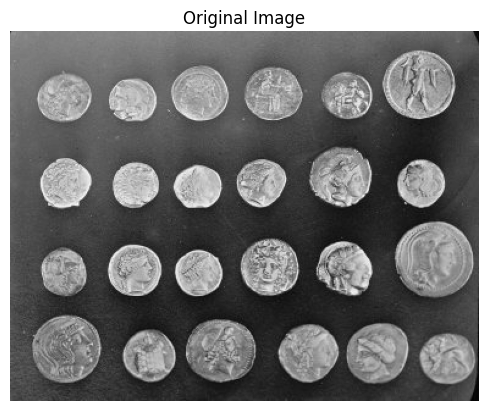

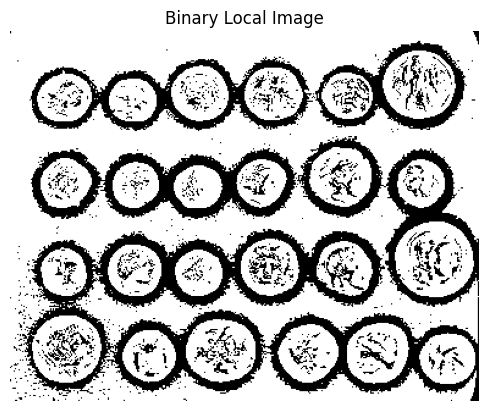

In [64]:
#Local Thresholding

from skimage.filters import threshold_local

block_size = 35

local_threshold = threshold_local(coins_image, block_size, offset = 10)

binary_local = coins_image > local_threshold

show_image(coins_image, 'Original Image')
show_image(binary_local, 'Binary Local Image')

For the coins image, background is uniform so we can see that global thresholding works better.

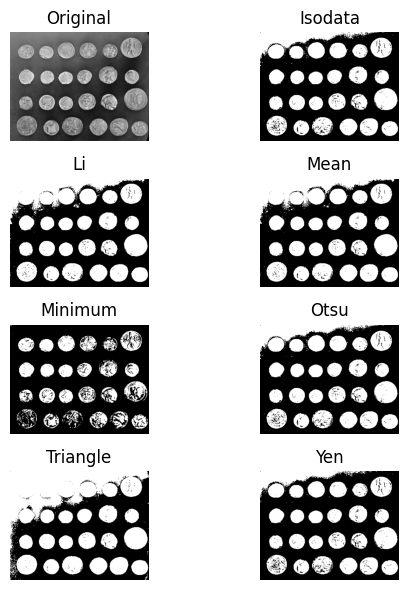

In [69]:
#Using all other thresholding algorithms

from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(coins_image, figsize=(6,6), verbose = False)
plt.show()